In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import PIL
import os


img_dir = 'VOC2012/Images 5000/'
annotations_dir = 'VOC2012/Annotations 5000/'

input_dir = 'VOC2012/'
output_dir = 'working'

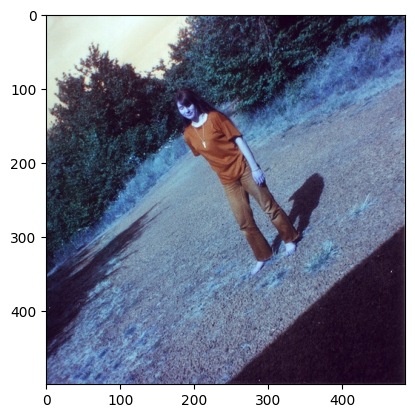

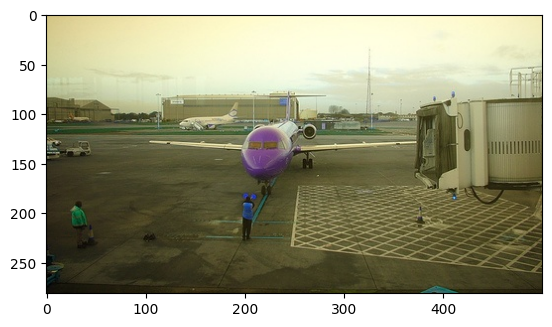

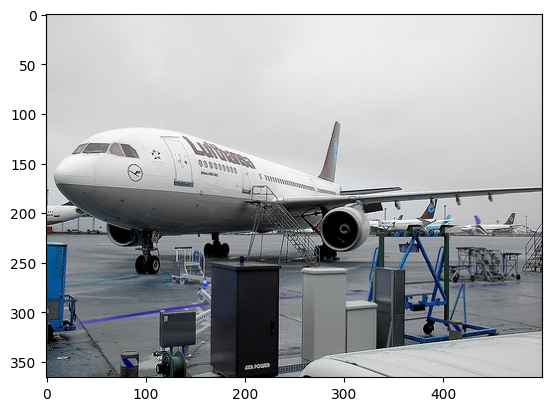

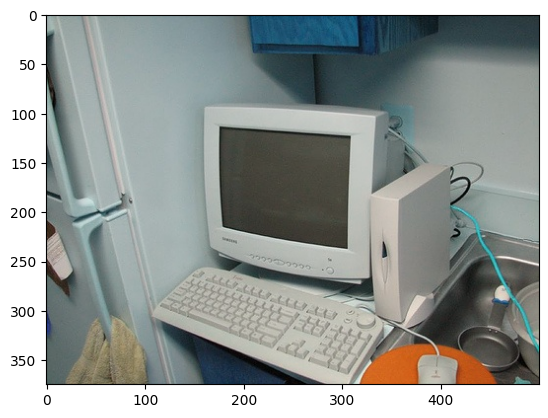

In [15]:
for idx, image in enumerate(os.listdir(img_dir)):
    img = cv2.imread(os.path.join(img_dir, image), 1)
    plt.imshow(img)
    plt.show()
    
    if idx == 3:
        break



## DATA PREPROCESSING

In [16]:
img_file_path = []
for img in os.listdir(img_dir):
    image  = cv2.imread(os.path.join(img_dir, img), 0)
    img_file_path.append(f'{img}')

In [17]:
import xml.etree.ElementTree as ET
import glob

df = { 'name': [],
        'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(annotations_dir + '/*.xml')):
    trees = ET.parse(anno)
    
    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)
               
        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width = int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))
                    
        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]] 
                    df['name'] += [anno.split('/')[-1][0:-4]]
                    
                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]
                            
                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

In [18]:
df1 = pd.DataFrame(df)
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Annotations 5000\2007_000027,person,486,500,174,101,349,351
1,Annotations 5000\2007_000032,aeroplane,500,281,104,78,375,183
2,Annotations 5000\2007_000032,aeroplane,500,281,133,88,197,123
3,Annotations 5000\2007_000032,person,500,281,195,180,213,229
4,Annotations 5000\2007_000032,person,500,281,26,189,44,238


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14402 entries, 0 to 14401
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    14402 non-null  object
 1   label   14402 non-null  object
 2   width   14402 non-null  int64 
 3   height  14402 non-null  int64 
 4   xmin    14402 non-null  int64 
 5   ymin    14402 non-null  int64 
 6   xmax    14402 non-null  int64 
 7   ymax    14402 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 900.2+ KB


In [22]:
label_map = {'aeroplane':0,
            'bicycle':1,
            'bird':2,
            'boat':3,
            'bottle':4,
            'bus':5,
            'car':6,
            'cat':7,
            'chair':8,
            'cow':9,
            'diningtable':10,
            'dog':11,
            'horse':12,
            'motorbike':13,
            'person':14,
            'pottedplant':15,
            'sheep':16,
            'sofa':17,
            'train':18,
            'tvmonitor':19}

df1['class'] = df1['label'].map(label_map)

In [23]:
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,Annotations 5000\2007_000027,person,486,500,174,101,349,351,14
1,Annotations 5000\2007_000032,aeroplane,500,281,104,78,375,183,0
2,Annotations 5000\2007_000032,aeroplane,500,281,133,88,197,123,0
3,Annotations 5000\2007_000032,person,500,281,195,180,213,229,14
4,Annotations 5000\2007_000032,person,500,281,26,189,44,238,14


In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(img_file_path, test_size=0.2, random_state=101)
train, val = train_test_split(train, test_size=0.15, random_state=101)

In [60]:
train[0]

'2008_000568.jpg'

In [ ]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# !pip install -qr requirements.txt

In [57]:
os.chdir('/working')
os.mkdir('./yolov5/data/train')
os.mkdir('./yolov5/data/val')
os.mkdir('./yolov5/data/test')
os.mkdir('./yolov5/data/train/images')
os.mkdir('./yolov5/data/train/labels')
os.mkdir('./yolov5/data/val/images')
os.mkdir('./yolov5/data/val/labels')
os.mkdir('./yolov5/data/test/images')
os.mkdir('./yolov5/data/test/labels')

In [64]:
# copy the image data in the yolov5 folder 
def copy_image_file(image_items, folder_name):
    
    for image in image_items:
        img = PIL.Image.open(f'{img_dir}/{image}')
        img1 = img.resize((640, 480))
        _ = img1.save(f'{output_dir}/yolov5/data/{folder_name}/images/{image}')

copy_image_file(train, 'train')
copy_image_file(val, 'val')
copy_image_file(test, 'test')

Resize the annotation box, because here change the image size so we can change the annotation box size. and find the center of the coordinates

In [65]:
df1['xmin'] = (640/df1['width']) * df1['xmin']
df1['ymin'] = (480/df1['height']) * df1['ymin']
df1['xmax'] = (640/df1['width']) * df1['xmax']
df1['ymax'] = (480/df1['height']) * df1['ymax']
df1.head()


,name,label,width,height,xmin,ymin,xmax,ymax,class
0,Annotations 5000\2007_000027,person,486,500,229.135802,96.960000,459.588477,336.960000,14
1,Annotations 5000\2007_000032,aeroplane,500,281,133.120000,133.238434,480.000000,312.597865,0
2,Annotations 5000\2007_000032,aeroplane,500,281,170.240000,150.320285,252.160000,210.106762,0
3,Annotations 5000\2007_000032,person,500,281,249.600000,307.473310,272.640000,391.174377,14
4,Annotations 5000\2007_000032,person,500,281,33.280000,322.846975,56.320000,406.548043,14


In [66]:
df1[['xmin', 'ymin', 'xmax', 'ymax']] = df1[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')

In [67]:
WIDTH = 640
HEIGHT = 480

df1['x_center'] = (df1['xmin']+df1['xmax'])/(2*WIDTH)
df1['y_center'] = (df1['ymin']+df1['ymax'])/(2*HEIGHT)
df1['box_width'] = (df1['xmax']-df1['xmin'])/ WIDTH
df1['box_height'] = (df1['ymax']-df1['ymin'])/ HEIGHT

df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,Annotations 5000\2007_000027,person,486,500,229,96,459,336,14,0.537500,0.450000,0.359375,0.500000
1,Annotations 5000\2007_000032,aeroplane,500,281,133,133,480,312,0,0.478906,0.463542,0.542188,0.372917
2,Annotations 5000\2007_000032,aeroplane,500,281,170,150,252,210,0,0.329688,0.375000,0.128125,0.125000
3,Annotations 5000\2007_000032,person,500,281,249,307,272,391,14,0.407031,0.727083,0.035937,0.175000
4,Annotations 5000\2007_000032,person,500,281,33,322,56,406,14,0.069531,0.758333,0.035937,0.175000


In [68]:
df1 = df1.astype(str)
img_file_path[:5]

['2007_000027.jpg',
 '2007_000032.jpg',
 '2007_000033.jpg',
 '2007_000039.jpg',
 '2007_000042.jpg']

In [ ]:
# copy the label data in the yolov5 folder 

def copy_label(label_items, folder_name):
    file_name = [x.split('.')[0] for x in img_file_path]
    for name in file_name:
        data = df1[df1.name == name]

        box_list = []
        for idx in range(len(data)):
            row = data.iloc[idx]
            box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

        text = "\n".join(box_list)
        with open(f'{output_dir}/yolov5/data/{folder_name}/labels/{name}.txt', 'w') as file:
            file.write(text)


copy_label(train, 'train')
copy_label(val, 'val')
copy_label(test, 'test')


In [76]:
# Configure .yaml file

yaml_file = """train: working/yolov5/data/train/images
val: working/yolov5/data/val/images
                
nc: 20
names: [aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,cow,diningtable,dog,
                        horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor]"""

with open('working/yolov5/data/data.yaml', 'w') as f:
    f.write(yaml_file)

In [92]:
os.getcwd()

'd:\\Deep Learning Models'

In [ ]:
!python "D:\Deep Learning Models\yolov5\train.py" --img 640 --epochs 50 --batch 32 --data "D:\Deep Learning Models\yolov5\data\data.yaml" --cfg "D:\Deep Learning Models\yolov5\models\yolov5s.yaml" --weights yolov5s.pt --name pascal_voc2012_yolov5

## Model Evaluate

In [ ]:
from IPython.display import Image as Display

Display(filename='/working/yolov5/runs/train/pascal_voc2012_yolov5/results.png', width=1080)

In [ ]:
Display(filename='/kaggle/working/yolov5/runs/train/pascal_voc2012_yolov5/train_batch0.jpg', width=600)